# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

27


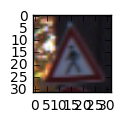

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Step 3: Preprocess Data

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Step 4: Generate Fake Data

In [7]:
import cv2

# Function from http://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point
def rotateImage(image, angle):
    center=tuple(np.array(image.shape[0:2])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[0:2],flags=cv2.INTER_LINEAR)

def transImage(image):
    M = np.float32([[1,0,random.randint(-10,10)],[0,1,random.randint(-10,10)]])
    return cv2.warpAffine(image,M,(32,32))
    
temp = len(X_train)*.20
temp = int(temp)

for i in range(temp):
    if i % 2 == 0:
        test_img = rotateImage(X_train[i],random.uniform(-10,10))
    else:
        test_img = transImage(X_train[1])
                
    test_img2 = np.reshape(test_img,(1,32,32,3))
    
    y_add = y_train[i]
    y_add = np.reshape(y_add,(1,))
    
    X_train = np.concatenate((X_train,test_img2))
    y_train = np.concatenate((y_train,y_add))
    
    if i % 250 == 0:
        print('Number of added samples:',i,'out of:',temp)

print('Image creation done!')

X_train, y_train = shuffle(X_train, y_train)

Number of added samples: 0 out of: 7841
Number of added samples: 250 out of: 7841
Number of added samples: 500 out of: 7841
Number of added samples: 750 out of: 7841
Number of added samples: 1000 out of: 7841
Number of added samples: 1250 out of: 7841
Number of added samples: 1500 out of: 7841
Number of added samples: 1750 out of: 7841
Number of added samples: 2000 out of: 7841
Number of added samples: 2250 out of: 7841
Number of added samples: 2500 out of: 7841
Number of added samples: 2750 out of: 7841
Number of added samples: 3000 out of: 7841
Number of added samples: 3250 out of: 7841
Number of added samples: 3500 out of: 7841
Number of added samples: 3750 out of: 7841
Number of added samples: 4000 out of: 7841
Number of added samples: 4250 out of: 7841
Number of added samples: 4500 out of: 7841
Number of added samples: 4750 out of: 7841
Number of added samples: 5000 out of: 7841
Number of added samples: 5250 out of: 7841
Number of added samples: 5500 out of: 7841
Number of added s

# Step 5: Normalize Data

In [8]:
# Normalize the data features to the variable X_normalized
def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train = normalize_grayscale(X_train)
X_test = normalize_grayscale(X_test)

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (47050, 32, 32, 3)
Shape of X_test: (12630, 32, 32, 3)


# Step 6: Create Validation Set

Create a validation set from the training data using the train_test_split using the sklearn function.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_train_valid, y_train, y_train_valid = train_test_split(X_train, y_train, test_size=.25)

# Check Size of Split
print('X train set: ', len(X_train), 'vs. X_train_valid: ', len(X_train_valid))
print('Y train set: ', len(y_train), 'vs. y_train_valid: ', len(y_train_valid))

X train set:  35287 vs. X_train_valid:  11763
Y train set:  35287 vs. y_train_valid:  11763


# Step 7: Setup TensorFlow

In [10]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 256

# Step 8: LeNet Architecture

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    epsilon = .001
    
    # Layer 0: Dropout - 20%
    layer0_w = tf.Variable(tf.truncated_normal([1,1,3,3],mean=mu,stddev=sigma))
    layer0_b = tf.Variable(tf.zeros(3))
    
    layer0 = tf.nn.conv2d(x,layer0_w,[1,1,1,1],padding='VALID')+layer0_b
    
    keep_prob = tf.constant(0.75)
    
    layer0 - tf.nn.dropout(layer0, keep_prob)
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x6
    layer1_w = tf.Variable(tf.truncated_normal([3,3,3,6],mean=mu,stddev=sigma))
    layer1_b = tf.Variable(tf.zeros(6))
    
    layer1 = tf.nn.conv2d(layer0,layer1_w,[1,1,1,1],padding='VALID')+layer1_b
    
    layer1_batch_mean, layer1_batch_var = tf.nn.moments(layer1,[0])
    
    layer1_scale = tf.Variable(tf.ones([30,6]))
    layer1_beta = tf.Variable(tf.zeros([30,6]))
    
    layer1 = tf.nn.batch_normalization(layer1,layer1_batch_mean,layer1_batch_var,layer1_beta,layer1_scale,epsilon)
    
    layer1 = tf.nn.relu(layer1)

    # Layer 2: Convolutional. Input = 30x30x6. Output = 28x28x12
    layer2_w = tf.Variable(tf.truncated_normal([3,3,6,12],mean=mu,stddev=sigma))
    layer2_b = tf.Variable(tf.zeros(12))
    
    layer2 = tf.nn.conv2d(layer1,layer2_w,[1,1,1,1],padding='VALID')+layer2_b
    
    layer2_batch_mean, layer2_batch_var = tf.nn.moments(layer2,[0])
    
    layer2_scale = tf.Variable(tf.ones([28,12]))
    layer2_beta = tf.Variable(tf.zeros([28,12]))
    
    layer2 = tf.nn.batch_normalization(layer2,layer2_batch_mean,layer2_batch_var,layer2_beta,layer2_scale,epsilon)
    
    layer2 = tf.nn.relu(layer2)
    
    # Layer 2.5 Pooling. Input = 28x28x12. Output = 14x14x12.
    layer2_5 = tf.nn.max_pool(layer2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    

    # Layer 3: Convolutional. Input = 14x14x12. Output = 12x12x24
    layer3_w = tf.Variable(tf.truncated_normal([3,3,12,24],mean=mu,stddev=sigma))
    layer3_b = tf.Variable(tf.zeros(24))
    
    layer3 = tf.nn.conv2d(layer2_5,layer3_w,[1,1,1,1],padding='VALID')+layer3_b
    
    layer3_batch_mean, layer3_batch_var = tf.nn.moments(layer3,[0])
    
    layer3_scale = tf.Variable(tf.ones([12,24]))
    layer3_beta = tf.Variable(tf.zeros([12,24]))
    
    layer3 = tf.nn.batch_normalization(layer3,layer3_batch_mean,layer3_batch_var,layer3_beta,layer3_scale,epsilon)
    
    layer3 = tf.nn.relu(layer3)
    

    # Layer 4: Convolutional. Input = 12x12x24. Output = 10x10x48
    layer4_w = tf.Variable(tf.truncated_normal([3,3,24,48],mean=mu,stddev=sigma))
    layer4_b = tf.Variable(tf.zeros(48))
    
    layer4 = tf.nn.conv2d(layer3,layer4_w,[1,1,1,1],padding='VALID')+layer4_b
    
    layer4_batch_mean, layer4_batch_var = tf.nn.moments(layer4,[0])
    
    layer4_scale = tf.Variable(tf.ones([10,48]))
    layer4_beta = tf.Variable(tf.zeros([10,48]))
    
    layer4 = tf.nn.batch_normalization(layer4,layer4_batch_mean,layer4_batch_var,layer4_beta,layer4_scale,epsilon)
    
    layer4 = tf.nn.relu(layer4)
    
    # Layer 4.5 Pooling. Input = 10x10x48. Output = 5x5x48.
    layer4_5 = tf.nn.max_pool(layer4,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')  

    # Layer 5: Convolutional. Input = 5x5x48. Output = 3x3x96
    layer5_w = tf.Variable(tf.truncated_normal([3,3,48,96],mean=mu,stddev=sigma))
    layer5_b = tf.Variable(tf.zeros(96))
    
    layer5 = tf.nn.conv2d(layer4_5,layer5_w,[1,1,1,1],padding='VALID')+layer5_b
    
    layer5_batch_mean, layer5_batch_var = tf.nn.moments(layer5,[0])
    
    layer5_scale = tf.Variable(tf.ones([3,96]))
    layer5_beta = tf.Variable(tf.zeros([3,96]))
    
    layer5 = tf.nn.batch_normalization(layer5,layer5_batch_mean,layer5_batch_var,layer5_beta,layer5_scale,epsilon)
    
    layer5 = tf.nn.relu(layer5)
    
    #Flatten. Input = 3x3x96. Output = 864.
    layer5_flat = flatten(layer5)
    
    #Layer 6: Fully Connected. Input = 864. Output = 432.
    layer6_w = tf.Variable(tf.truncated_normal(shape=(864,432),mean=mu,stddev=sigma))
    layer6_b = tf.Variable(tf.zeros(432))
    
    layer6 = tf.matmul(layer5_flat,layer6_w)+layer6_b
    
    layer6_batch_mean, layer6_batch_var = tf.nn.moments(layer6,[0])
    
    layer6_scale = tf.Variable(tf.ones([432]))
    layer6_beta = tf.Variable(tf.zeros([432]))
    
    layer6 = tf.nn.batch_normalization(layer6,layer6_batch_mean,layer6_batch_var,layer6_beta,layer6_scale,epsilon)
    
    layer6 = tf.nn.relu(layer6)
    

    #Layer 7: Fully Connected. Input = 432. Output = 216.
    layer7_w = tf.Variable(tf.truncated_normal(shape=(432,216),mean=mu,stddev=sigma))
    layer7_b = tf.Variable(tf.zeros(216))
    
    layer7 = tf.matmul(layer6,layer7_w)+layer7_b
    
    layer7_batch_mean, layer7_batch_var = tf.nn.moments(layer7,[0])
    
    layer7_scale = tf.Variable(tf.ones([216]))
    layer7_beta = tf.Variable(tf.zeros([216]))
    
    layer7 = tf.nn.batch_normalization(layer7,layer7_batch_mean,layer7_batch_var,layer7_beta,layer7_scale,epsilon)
    
    layer7 = tf.nn.relu(layer7)
    
    #Layer 8: Fully Connected. Input = 216. Output = 108.
    layer8_w = tf.Variable(tf.truncated_normal(shape=(216,108),mean=mu,stddev=sigma))
    layer8_b = tf.Variable(tf.zeros(108))
    
    layer8 = tf.matmul(layer7,layer8_w)+layer8_b
    
    layer8_batch_mean, layer8_batch_var = tf.nn.moments(layer8,[0])
    
    layer8_scale = tf.Variable(tf.ones([108]))
    layer8_beta = tf.Variable(tf.zeros([108]))
    
    layer8 = tf.nn.batch_normalization(layer8,layer8_batch_mean,layer8_batch_var,layer8_beta,layer8_scale,epsilon)
    
    #layer8 = tf.nn.relu(layer8)
    
    layer8 = tf.nn.dropout(layer8, tf.constant(0.75))

    
    #Layer 9: Fully Connected. Input = 108. Output = 43.
    layer9_w = tf.Variable(tf.truncated_normal(shape=(108,43),mean=mu,stddev=sigma))
    layer9_b = tf.Variable(tf.zeros(43))
    
    layer9 = tf.matmul(layer8,layer9_w)+layer9_b
    
    layer9_batch_mean, layer9_batch_var = tf.nn.moments(layer9,[0])
    
    layer9_scale = tf.Variable(tf.ones([43]))
    layer9_beta = tf.Variable(tf.zeros([43]))
    
    layer9 = tf.nn.batch_normalization(layer9,layer9_batch_mean,layer9_batch_var,layer9_beta,layer9_scale,epsilon)
    
    logits = tf.nn.relu(layer9)
    
    return logits

# Step 9: Set up TensorFlow Placeholders

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Step 10: Create training pipeline

In [13]:
rate = 0.00075
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate, beta1 = 0.9, beta2 = 0.999, epsilon = .001)
training_operation = optimizer.minimize(loss_operation)

# Step 11: Create Evaluation Function

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Step 12: Train the model

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_train_valid, y_train_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_model/model')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.8961

EPOCH 2 ...
Validation Accuracy = 0.9095

EPOCH 3 ...
Validation Accuracy = 0.9101

EPOCH 4 ...
Validation Accuracy = 0.9129

EPOCH 5 ...
Validation Accuracy = 0.9125

EPOCH 6 ...
Validation Accuracy = 0.9137

EPOCH 7 ...
Validation Accuracy = 0.9144

EPOCH 8 ...
Validation Accuracy = 0.9140

EPOCH 9 ...
Validation Accuracy = 0.9154

EPOCH 10 ...
Validation Accuracy = 0.9137

Model saved


# Step 13: Evaluate Model

In [16]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_model/model.meta')
    loader.restore(sess, 'lenet_model/model')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.961


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

For preprocessing, I used data shuffling and gray scale normalization. I chose to use data shuffling to develop a more robust model. I didn't want the order of the data to significantly impact the generation of the model. I also chose to implment gray scale normalization on the pixel data of each image to create a distribution about the orgin (zero). I chose to implement this technique to reduce the model's underfitting characteristics with the generation of fake data (next question). 

During tests, I noticed that the addition of the gray scale normalization didn't significantly impact the the underfit of the model. I believe this may be due to the use of batch normalization on many of the neural network layers as batch normalization seems to acomplish the same goal.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used the pickled training dataset to create an augmented dataset consisting of original images and transformed images. I created the transformed data by sampling 20% of the original dataset and applying a slight translation or slight rotation of those images. I then added the transformed images to the original dataset.

I used the image transformations to reduce over-fitting in the neural network model. Without the augment images, there was approximately a 4% disparity between the training stage and the testing stage of the neural network. By augmenting the dataset, I was able to revserse the over-fitting and ended up improving the test accuracy of the model.

I created the validation data for the model from the augmented dataset of training images. I used 25% of the total training set to create the valdiation dataset as this value tended to reduce under-fitting and yield the highest test accuracy.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is a Convolotional Neural Network that consists of 10 layers and implements a mixture of batch normalization, dropout, and relu activation. 

Layer 1 has an input size of 32x32x3 to represent the 32 x 32 pixel size of the input image. The layer has a depth of 3 to represent the RGB value of the input image. The layer uses a convolution with a 1x1 filter and dropout activation in order to reduce over-fitting in the model. The implementation of dropout was able to make the model more flexible with hyperparameters and improved the overall accuracy during test cases. Layer 1's output is 30x30x6.

Layer 2 has an input size of 30x30x6 to match the output of Layer 1. Layer 2 implements a convolution with a 3x3 filter which results in an output size of 28x28x12. After the convolution, a batch normalization is performed to normalize the data and a relu activation is used. 

Layer 2.5 feeds the output of Layer 2, size 28x28x12 into a 2x2 Max Pooling operation which results in an output size of 14x14x12. This is a subsampling layer.

Layer 3 has an input size of 14x14x12 and follows a similar set of operations as Layer 1. A convolution is performed with a 3x3 filter and the data is subjected to a batch normalization process. The activation for Layer 3 is a relu operation and the Layer's output size is 12x12x24. 

Layer 4 has an input size of 12x12x24 and undergoes a the same set of operations as Layer 3. A convolution is performed with a 3x3 filter and the dadta is subjected to a batch normalization process. The activation used for Layer 4 is aslo a relu operation. This yields an output size of 10x10x48. Layer 4 uses a relu activation.

Layer 4.5 subjects the Layer 4 output data, size 10x10x48, to a 2x2 Max Pooling operation to reduce possible overfitting. This subsampling layer results in a final output size of 5x5x48.

Layer 5 has an input size of 5x5x48 and an output size of 3x3x96 after a convolution with a 3x3 filter, batch normalization, and a relu activation. Layer 5 is converted into a fully connected layer via a flatten process with an output size of 864.

Layer 6 is a fully connected layer and has an input size of 864. Layer 6 is reduced by a matrix multiplication step to an output size of 432. A batch normalization process is then implemented on the data and a relu activation is used.

Layer 7 is a fully connected layer and has an input size of 432. Layer 6 is reduced by a matrix multiplication step to an output size of 216. A batch normalization process is then implemented on the data and a relu activation is used.

Layer 8 is a fully connected layer and has an input size of 216. Layer 6 is reduced by a matrix multiplication step to an output size of 108. A batch normalization process is then implemented on the data and a dropout activation is used. The dropout activation was implemented to reduce the model's tendency to underfit the data.

Layer 9 is a fully connected layer and has an input size of 108. Layer 6 is reduced by a matrix multiplication step to an output size of 43. A batch normalization process is then implemented on the data and a relu activation is used. The output of Layer 9 is the output of the neural network.

---------

The use of batch normalization throughout the model was to normalize the data prior to using the activation functions. This implementation was originally introduced to offset the lack of preprocessing on the input data. However, after running tests with and without the preprocessing, batch normalization seems to have created a robust network and reduce under/over-fitting.

Dropout activations were placed in Layers 1 and 8 to reduce under/over-fitting. The before/after cases have shown that the use of the dropout activations create a more robust network as these operations reduced the amount of under/overfitting.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the AdamOptimzer from TensorFlow as it provided the best results during my simple test cases. I chose beta1, beta2, and epsilon values based on the values chosen by Zeiler [ADADELTA: AN ADAPTIVE LEARNING RATE METHOD, ZEILER 2012]. 

I used a batch size of 256 as it tended to utilize the most resources without causing problems on my local machine. 

I used 10 epochs to train the model. The 10 epochs ended up provided a fairly steady value for most cases between 9 and 10. Also, additional epochs took significantly longer to perform. So, I adjusted hyperparameters to provide the highest accuracy in a reasonable amount of time.

I used a mean of 0 for the model, but changed the standard deviation to 0.01. The reduced standard deviation provided a stepper increase in training accuracy between epochs 1 and 3, which allowed the model to yield higher accuracies during test cases.

The learning rate was reduced to 0.00075 to provide a steeper curve in the improvements between EPOCHs. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started tackling the problem by implementing the LeNet Architecture and modifying hyperparameters until I stopped seeing improvements. At that point, I was able to achieve approximately 90% accuracy on the test dataset. I did notice that this model has a significant amount over-fitting as my training accuracies were typically > 99%. 

My next step was to implement a data augmentation section to reduce over-fitting. However, once I created the augmented dataset I noticed that the overall model accuracy sharply dropped. I then spent some time looking at different, standard convolutional architectures in a variety of academic papers. I decided on creating an architecture similar to VGG for a smaller input image size and implement batch normalization.

After re-creating the architecture, my model was able to achieve a test accuracy of 94%, but there was still a significant amount of over-fitting. I reintroduced the data augmentation and implemented two dropout activations to achieve > 95% accuracy for test cases. 

---

## Step 14: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)
(5,)


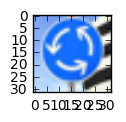

In [17]:
### Load Test Images

p1 = cv2.imread('pics/p_1.png')
p2 = cv2.imread('pics/p_2.png')
p3 = cv2.imread('pics/p_3.png')
p4 = cv2.imread('pics/p_4.png')
p5 = cv2.imread('pics/p_5.png')

b,g,r = cv2.split(p1)
p1 = cv2.merge([r,g,b])

b,g,r = cv2.split(p2)
p2 = cv2.merge([r,g,b])

b,g,r = cv2.split(p3)
p3 = cv2.merge([r,g,b])

b,g,r = cv2.split(p4)
p4 = cv2.merge([r,g,b])

b,g,r = cv2.split(p5)
p5 = cv2.merge([r,g,b])

p1 = np.asarray(p1)
q1 = [14]
p2 = np.asarray(p2)
q2 = [1]
p3 = np.asarray(p3)
q3 = [2]
p4 = np.asarray(p4)
q4 = [40]
p5 = np.asarray(p5)
q5 = [8]

p_test = np.stack([p1,p2,p3,p4,p5],axis=0)
q_test = q1+q2+q3+q4+q5
q_test = np.asarray(q_test)
print(p_test.shape)
print(q_test.shape)

temp = p_test[3].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(temp)

# Normalize New Images

In [18]:
# Normalize the data features to the variable X_normalized
p_test = normalize_grayscale(p_test)

print(p_test.shape)

(5, 32, 32, 3)


# Test New Images with Model

In [19]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_model/model.meta')
    loader.restore(sess, 'lenet_model/model')
    test_accuracy = evaluate(p_test, q_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images used were found on the internet and have some background landscape in them. The signs are also slightly sheared as they are actual photos of the roads. In addition, all of the images were reduced to 32x32 pixels using MATLAB. This reduction caused large translations of the signs with resepect to the boarders of the image.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model does not perform as well on the new images as on the test data set. On the test data, the model has an accuracy of approximately 96%. On the new images, the model is only able to classify 3 of the 5 images (60%).

The poor performance of the model on the new images can be due to how the images were created as well as the small sample of new images used. Only 5 new images were used to test the model. These images may have been more difficult for the model to accuractely classify as the sign may not be centered as well as in the test data set. A solution to this can be to generate more dramatic images in the "Fake Data Generation" section. The new image creation was detailed in the previous question/answer section. 

In [20]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_model/model.meta')
    loader.restore(sess, 'lenet_model/model')
    soft_max = tf.nn.softmax(logits)
    [values,indicies] = sess.run(tf.nn.top_k(soft_max, k=3), feed_dict = {x: p_test})
    print('Values:')
    print(values)
    print()
    print('Indicies:')
    print(indicies)

Values:
[[ 0.23304178  0.127831    0.0972572 ]
 [ 0.29047236  0.08051208  0.06597093]
 [ 0.24688865  0.13496825  0.10235048]
 [ 0.20618612  0.15833923  0.06934798]
 [ 0.21244882  0.20830612  0.10963945]]

Indicies:
[[13 10 14]
 [ 1  5 16]
 [ 2 12  3]
 [38  9 25]
 [ 4  8  7]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The softmax probabilities for the correct model predictions tended to have a distribution that valued the correct choices significantly higher than the incorrect choices. The softmax probabilities for incorrect choices tended to have a uniform probabilities amoung the three highest probability choices. 

Softmax Probabilities:


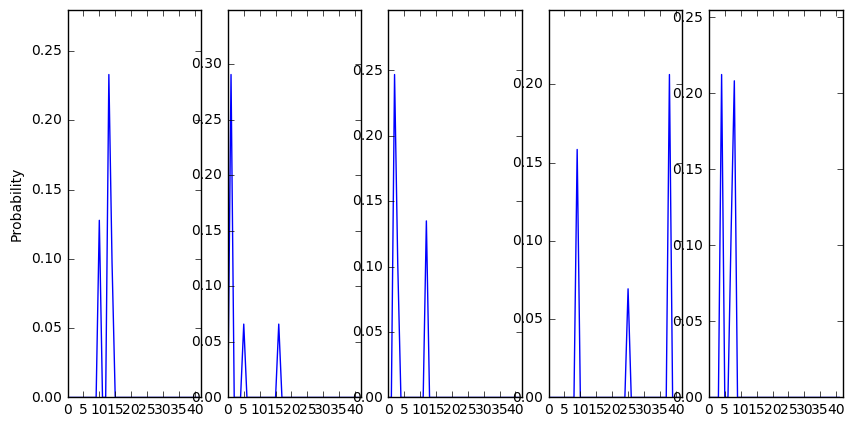

In [21]:
x1 = np.arange(0,42,1)
x2 = np.arange(0,42,1)
x3 = np.arange(0,42,1)
x4 = np.arange(0,42,1)
x5 = np.arange(0,42,1)

y1 = np.zeros(42)
y2 = np.zeros(42)
y3 = np.zeros(42)
y4 = np.zeros(42)
y5 = np.zeros(42)


# Add Values
y1[indicies[0,0]] = values[0,0] 
y1[indicies[0,1]] = values[0,1] 
y1[indicies[0,2]] = values[0,2] 

y2[indicies[1,0]] = values[1,0] 
y2[indicies[1,1]] = values[1,2] 
y2[indicies[1,2]] = values[1,2] 

y3[indicies[2,0]] = values[2,0] 
y3[indicies[2,1]] = values[2,1] 
y3[indicies[2,2]] = values[2,2] 

y4[indicies[3,0]] = values[3,0] 
y4[indicies[3,1]] = values[3,1] 
y4[indicies[3,2]] = values[3,2] 

y5[indicies[4,0]] = values[4,0] 
y5[indicies[4,1]] = values[4,1] 
y5[indicies[4,2]] = values[4,2] 

# Create Subplots

print('Softmax Probabilities:')

plt.figure(figsize=(10,5))

plt.subplot(1,5,1)
plt.plot(x1,y1)
plt.ylabel('Probability')
plt.axis((0,42,0,max(y1)*1.2))

plt.subplot(1,5,2)
plt.plot(x2,y2)
plt.ylabel('Probability')
plt.axis((0,42,0,max(y2)*1.2))

plt.subplot(1,5,3)
plt.plot(x3,y3)
plt.ylabel('Probability')
plt.axis((0,42,0,max(y3)*1.2))

plt.subplot(1,5,4)
plt.plot(x4,y4)
plt.ylabel('Probability')
plt.axis((0,42,0,max(y4)*1.2))

plt.subplot(1,5,5)
plt.plot(x5,y5)
plt.ylabel('Probability')
plt.axis((0,42,0,max(y5)*1.2))

plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.